# **Taller 1**

El conjunto de datos Iris es un conjunto de datos clásico en el campo del aprendizaje automático y la estadística. El conjunto de datos consiste en 150 muestras de iris de tres especies diferentes (setosa, versicolor y virginica), con 4 características (longitud y ancho de los sépalos, y longitud y ancho de los pétalos) medidas en centímetros. Cada especie tiene 50 muestras.

Las características del conjunto de datos son:
*  Longitud del sépalo (en centímetros).
*  Ancho del sépalo (en centímetros).
*  Longitud del pétalo (en centímetros).
*  Ancho del pétalo (en centímetros).

### **Uso de Machine Learning en el Dataset Iris:**

El conjunto de datos Iris es comúnmente utilizado en la comunidad de aprendizaje automático y ciencia de datos por varias razones:

*  Problema de Clasificación Simple
*  Evaluación de Modelos
*  Visualización y Análisis Exploratorio
*  Enseñanza y Aprendizaje

En resumen, el conjunto de datos Iris se utiliza ampliamente como un recurso educativo y de investigación en la comunidad de aprendizaje automático, proporcionando un caso práctico para la clasificación de especies basada en medidas morfológicas.
# ***A continuación hacemos un analísis exhaustivo de los datos***

Medida de Centralidad (Media) para cada atributo:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


Medida de Dispersión (Desviación Estándar) para cada atributo:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


Matriz de Correlación de los atributos de entrada:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)        

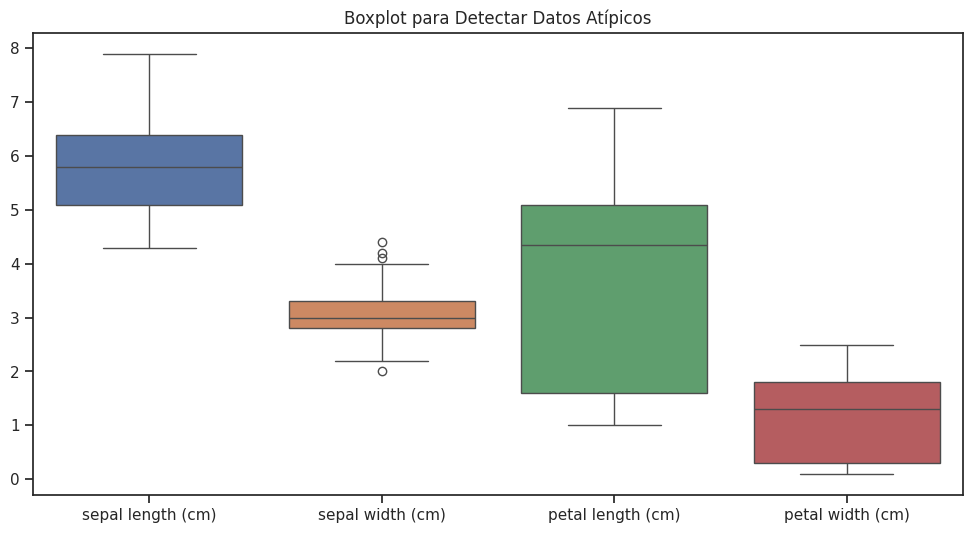

Conteo de registros por clase:
setosa        50
versicolor    50
virginica     50
Name: Tipo de planta, dtype: int64




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Tipo de planta
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names']+['target'])



# Crear un DataFrame
datapd = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Obtener la medida de centralidad para cada atributo
centralidad = datapd.mean()
print("Medida de Centralidad (Media) para cada atributo:")
print(centralidad)
print("\n")

# Obtener la medida de dispersión (desviación estándar) para cada atributo
dispersion = datapd.std()
print("Medida de Dispersión (Desviación Estándar) para cada atributo:")
print(dispersion)
print("\n")

# Calcular la matriz de correlación
correlacion = datapd.corr()
print("Matriz de Correlación de los atributos de entrada:")
print(correlacion)
print("\n")

# Detectar datos faltantes
datos_faltantes = datapd.isnull().sum()
print("Datos Faltantes por columna:")
print(datos_faltantes)
print("\n")

# Visualizar boxplots para detectar datos atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=datapd)
plt.title("Boxplot para Detectar Datos Atípicos")
plt.show()

# Agregar la columna 'Tipo de planta' con las etiquetas
datapd['Tipo de planta'] = iris.target_names[iris.target]

# Contar la cantidad de registros por clase
conteo_clases = datapd['Tipo de planta'].value_counts()
print("Conteo de registros por clase:")
print(conteo_clases)
print("\n")

# Visualizar las primeras filas del DataFrame
datapd.head()

# **La scatter matrix (matriz de dispersión)**
Es una herramienta visual que se utiliza para explorar la relación entre múltiples variables en un conjunto de datos. En lugar de analizar las relaciones de dos variables a la vez (como en un gráfico de dispersión), la scatter matrix permite visualizar las relaciones entre todas las variables en un conjunto de datos.

Cada celda de la matriz muestra un gráfico de dispersión de dos variables, y la diagonal principal de la matriz muestra histogramas univariados para cada variable. Aquí hay algunas razones por las cuales visualizar la scatter matrix puede ser útil:

**Exploración de Relaciones Multivariadas:** Permite identificar patrones complejos de relaciones entre múltiples variables simultáneamente. Esto es especialmente útil cuando se trabaja con conjuntos de datos que contienen varias características.

**Identificación de Tendencias y Patrones:** Al observar cómo las variables se dispersan en relación entre sí, se pueden identificar tendencias, patrones y posibles correlaciones en los datos.

**Diagnóstico de Problemas:** La matriz de dispersión también puede ser útil para identificar problemas como la presencia de datos atípicos, la colinealidad entre variables y la distribución de las variables.

**Selección de Características:** Al examinar la matriz de dispersión, puedes tomar decisiones informadas sobre qué variables pueden estar fuertemente relacionadas y, por lo tanto, pueden ser redundantes en un análisis o en la construcción de modelos.

Preparación para Modelos de Machine Learning: Antes de entrenar un modelo de machine learning, la visualización de la matriz de dispersión puede proporcionar información sobre la complejidad y la estructura de los datos, lo que puede influir en la elección del modelo y la configuración de parámetros.

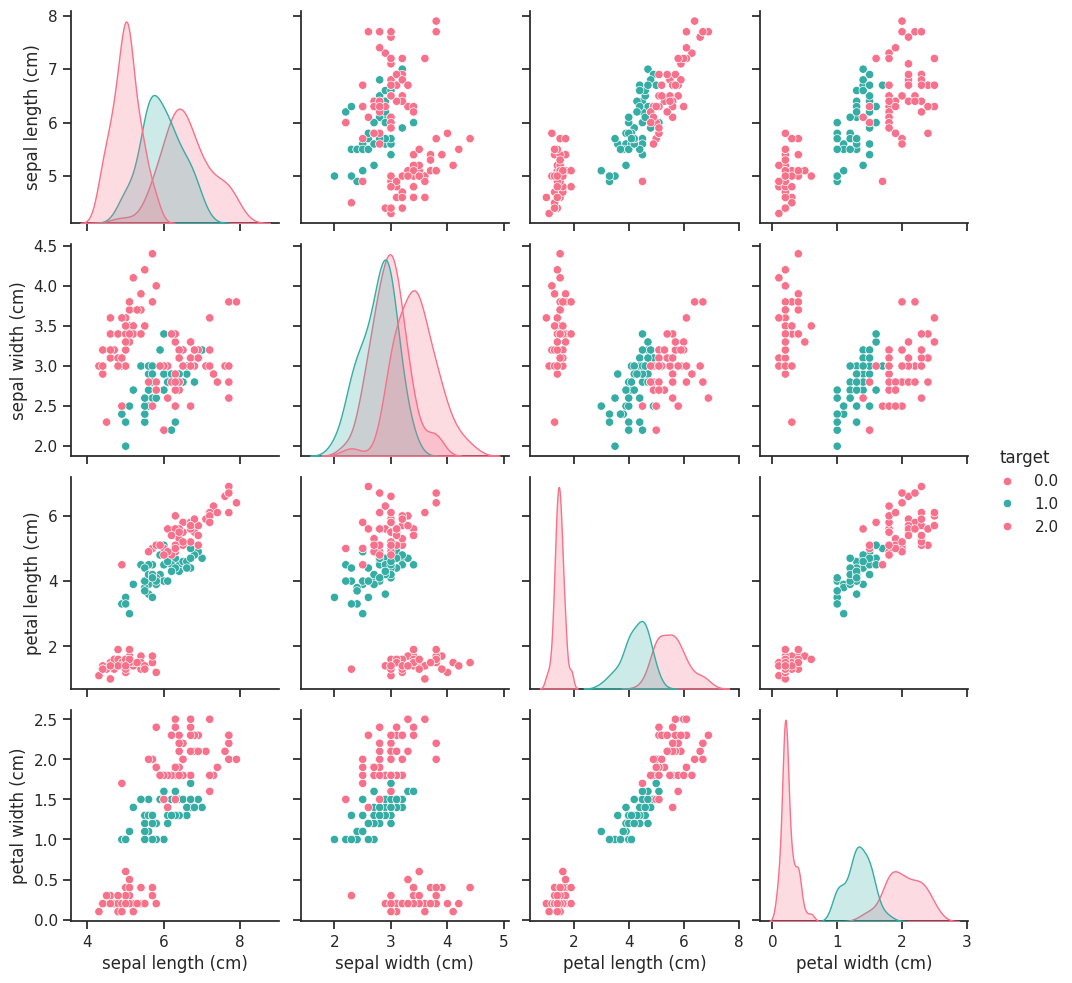

In [2]:
X = data.drop('target', axis=1) #estamos eliminando la columna target
y = data['target'] #para posteriormente usarla en y para almacenar la variable objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


def plot_scatter_matrix(data, target):
  sns.set(style="ticks") #Tipo de graficos
  sns.pairplot(data, hue=target, palette="husl") #Grafico de dispersion
  plt.show()

plot_scatter_matrix(data, 'target')

In [14]:
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Predicciones:\n{}".format(y_pred))
print("\n")
print("Puntaje de la prueba: {:.4f}".format(np.mean(y_pred == y_test)))
print("Puntaje de la prueba bajo KNN: {:.4f}".format(knn.score(X_test, y_test)))

Predicciones:
[2. 1. 0. 2. 0. 2. 0. 1. 2. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 1.]


Puntaje de la prueba: 0.9737
Puntaje de la prueba bajo KNN: 0.9737


# Métricas de Evaluación
Las métricas de evaluación son herramientas esenciales para comprender el rendimiento de un modelo de clasificación. En este análisis, se utilizan tres métricas clave: exactitud (accuracy), precisión (precision) y recall.

1. **Recall (Sensibilidad o Tasa de Verdaderos Positivos):**
  
  Es la proporción de instancias positivas que fueron correctamente identificadas por el modelo con respecto al total de instancias positivas reales. Se calcula como:
   - Recall = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)

2. **Precisión (Valor Predictivo Positivo):**

  Es la proporción de instancias positivas identificadas correctamente por el modelo con respecto al total de instancias positivas identificadas por el modelo. Se calcula como:
   - Precisión = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)

3. **Exactitud (Accuracy):**

  Es la proporción de instancias, tanto positivas como negativas, que fueron clasificadas correctamente por el modelo con respecto al total de instancias. Se calcula como:
   - Exactitud = (Verdaderos Positivos + Verdaderos Negativos) / Total de Instancias

Las métricas de evaluación, como verdaderos positivos (True Positives), verdaderos negativos (True Negatives), falsos positivos (False Positives) y falsos negativos (False Negatives), se relacionan con la matriz de confusión. La matriz de confusión es una tabla que resume el rendimiento de un modelo de clasificación en función de cuatro categorías: Verdaderos Positivos (VP), Verdaderos Negativos (VN), Falsos Positivos (FP) y Falsos Negativos (FN).

Supongamos que estás trabajando en un problema de clasificación binaria (dos clases: positiva y negativa). Aquí están las definiciones:

**Verdaderos Positivos (VP):** Son los casos en los que el modelo predijo correctamente la clase positiva. En otras palabras, el modelo clasificó correctamente las instancias que realmente pertenecen a la clase positiva.

**Verdaderos Negativos (VN):** Son los casos en los que el modelo predijo correctamente la clase negativa. En otras palabras, el modelo clasificó correctamente las instancias que realmente pertenecen a la clase negativa.

**Falsos Positivos (FP):** Son los casos en los que el modelo predijo incorrectamente la clase positiva. El modelo clasificó erróneamente instancias que en realidad pertenecen a la clase negativa.

**Falsos Negativos (FN):** Son los casos en los que el modelo predijo incorrectamente la clase negativa. El modelo clasificó erróneamente instancias que en realidad pertenecen a la clase positiva.



Exactitud:  0.9737
Precisión:  0.9763
Recall:  0.9737




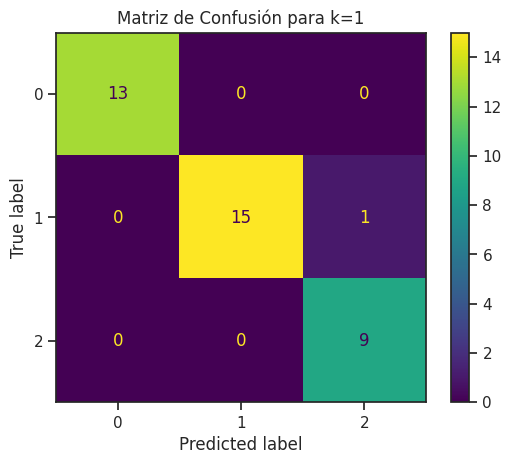

Valores de k que dan exactitud de 0.97: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 32]


In [32]:
k_values = []
for k in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  confusion_mat = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precission = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')

  # Verificar si todos los criterios son mayores o iguales a 0.96
  if accuracy >= 0.96 and precission >= 0.96 and recall >= 0.96:
    k_values.append(k)
    if len(k_values) == 1:
      # Visualizar la matriz de confusión con ConfusionMatrixDisplay
      print("\n")
      print(f'Exactitud: {accuracy: .4f}')
      print(f'Precisión: {precission: .4f}')
      print(f'Recall: {recall: .4f}')
      print("\n")
      disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)
      disp.plot(cmap='viridis', values_format='d')
      plt.title(f'Matriz de Confusión para k={k}')
      plt.show()

print(f'Valores de k que dan exactitud de 0.97: {k_values}')

Después de analizar la complejidad de diferentes modelos de k-Nearest Neighbors (k-NN) al variar el número de vecinos (k) y medir el desempeño del modelo para cada caso, se observa un comportamiento interesante. En particular, se nota que la elección adecuada de k tiene un impacto significativo en el rendimiento del modelo.

En el rango de k evaluado, se observa que para valores más bajos de k (específicamente en el rango de 24 a 31), el modelo tiende a tener una menor exactitud. Esto puede sugerir que, en este caso particular, un k más bajo conlleva a un modelo más complejo y sensible al ruido en los datos, lo que resulta en un rendimiento inferior en datos de prueba no vistos.

Por otro lado, cuando se aumenta k a 32, el modelo muestra un aumento significativo en la exactitud. Este cambio puede interpretarse como una reducción en la complejidad del modelo, lo que ayuda a mejorar la capacidad de generalización y a evitar el sobreajuste.

La conclusión es que, en este análisis, un k más alto (32 en este caso) parece ser más beneficioso en términos de rendimiento general. Se destaca la importancia de considerar la complejidad del modelo al ajustar el parámetro k.